## Part I: Breast Cancer Wisconsin Data

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [99]:
#importing the data
data = pd.read_csv("../data/breast_cancer_wisconsin/breast-cancer-wisconsin.data",
                   header = None, na_values = "?")
data.columns = ["id", "clump_thickness", "cell_size_uniformity", "cell_shape_uniformity", 
       "adhesion", "epithelial_cell_size", "bare_nuclei", "chromatin", "normal_nuclei", 
       "mitoses", "class"]
data.head()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,adhesion,epithelial_cell_size,bare_nuclei,chromatin,normal_nuclei,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [100]:
#checking for null values
data.isnull().sum()

id                        0
clump_thickness           0
cell_size_uniformity      0
cell_shape_uniformity     0
adhesion                  0
epithelial_cell_size      0
bare_nuclei              16
chromatin                 0
normal_nuclei             0
mitoses                   0
class                     0
dtype: int64

In [101]:
data.shape

(699, 11)

In [102]:
ids = data["id"]

In [103]:
#dropping rows where we have null values 
data.dropna(axis = 0, how = 'any', inplace = True)

In [104]:
data.shape

(683, 11)

In [105]:
data['class'].unique()

array([2, 4], dtype=int64)

**Our original dataset has two classes of data**

**Now we our doing clustering which is an usupervised, task, we are going to drop that column from our dataset** 


In [106]:
data.drop("class", axis = 1,  inplace = True)

In [107]:
data.columns

Index(['id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'adhesion', 'epithelial_cell_size',
       'bare_nuclei', 'chromatin', 'normal_nuclei', 'mitoses'],
      dtype='object')

In [108]:
# dropping the column id, since it has no semantic meaning
data.drop("id", axis = 1, inplace = True)

In [109]:
data.columns

Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'adhesion', 'epithelial_cell_size', 'bare_nuclei', 'chromatin',
       'normal_nuclei', 'mitoses'],
      dtype='object')

In [110]:
data.shape

(683, 9)

In [111]:
#checking all the data columns are numerical
data.dtypes

clump_thickness            int64
cell_size_uniformity       int64
cell_shape_uniformity      int64
adhesion                   int64
epithelial_cell_size       int64
bare_nuclei              float64
chromatin                  int64
normal_nuclei              int64
mitoses                    int64
dtype: object

### Clustering on unlabelled data

Text(0, 0.5, 'Sum of Squares Error')

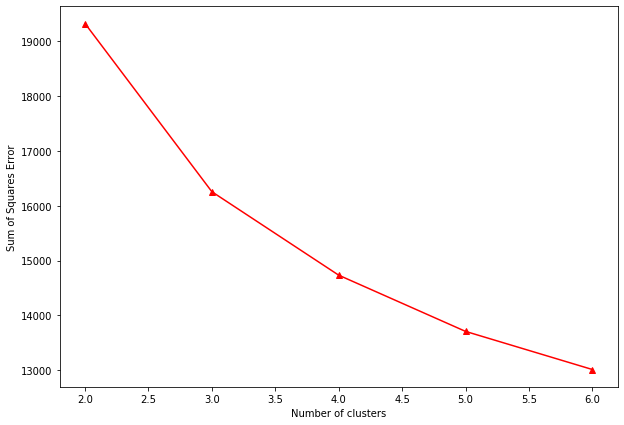

In [56]:
from sklearn import cluster 

numClusters = [2, 3, 4, 5, 6]
sse = []

for k in numClusters: 
    kMeans = cluster.KMeans(n_clusters = k)
    kMeans.fit(data)
    sse.append(kMeans.inertia_)
    
fig = plt.figure(figsize = (10, 7))
plt.plot(numClusters, sse, marker = '^', color = 'r')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squares Error")

***Here we observe an elbow like curve and a sharp decline in sum of squares error as we move from 2 clusters to 3 clusters. Hence, numClusters = 3, can be a good choice for number of clusters.It is also to be noted that, since we see a good decrease in SSE loss when move from numClusters = 3 -> 4, 4 can also be a good choice for number of clusters***

In [59]:
#getting the centers of clusters
centroids = kMeans.cluster_centers_ 
centroids.shape

(6, 9)

In [60]:
pd.DataFrame(centroids, columns = data.columns)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,adhesion,epithelial_cell_size,bare_nuclei,chromatin,normal_nuclei,mitoses
0,2.873832,1.198598,1.308411,1.264019,2.009346,1.231308,2.007009,1.128505,1.060748
1,6.419355,5.983871,6.096774,6.370968,4.983871,9.387097,6.677419,7.854839,1.967742
2,7.446154,5.292308,5.446154,4.415385,4.400000,9.615385,5.030769,2.415385,1.584615
3,7.431818,9.272727,9.500000,7.977273,7.659091,9.340909,7.227273,7.545455,5.295455
4,7.651163,8.720930,7.604651,5.395349,5.860465,3.139535,6.418605,7.511628,2.511628
5,6.487805,3.439024,3.878049,3.097561,4.024390,3.439024,3.878049,4.341463,1.829268


In [73]:
#finding top 5 nearest neighbours 
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 5)
neigh.fit(data)

dist, ind = neigh.kneighbors(centroids, 5, return_distance = True)

In [86]:
for i in range(len(centroids)): 
    print("5 closest points to centroid ", i, centroids[i])
    for j in range(5): 
        print("\t Point:",j, ", \t Distance= ", dist[i, j])
        print(data.iloc[ind[i, j]])
        print("----------------------------------------------------------------------")
    print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
    print()
    print()

5 closest points to centroid  0 [2.87383178 1.19859813 1.30841121 1.26401869 2.00934579 1.23130841
 2.00700935 1.12850467 1.06074766]
	 Point: 0 , 	 Distance=  0.542242354392396
clump_thickness          3.0
cell_size_uniformity     1.0
cell_shape_uniformity    1.0
adhesion                 1.0
epithelial_cell_size     2.0
bare_nuclei              1.0
chromatin                2.0
normal_nuclei            1.0
mitoses                  1.0
Name: 645, dtype: float64
----------------------------------------------------------------------
	 Point: 1 , 	 Distance=  0.542242354392396
clump_thickness          3.0
cell_size_uniformity     1.0
cell_shape_uniformity    1.0
adhesion                 1.0
epithelial_cell_size     2.0
bare_nuclei              1.0
chromatin                2.0
normal_nuclei            1.0
mitoses                  1.0
Name: 642, dtype: float64
----------------------------------------------------------------------
	 Point: 2 , 	 Distance=  0.542242354392396
clump_thickness   

## Hierarchical Clustering

### 1. Single Link Clustering

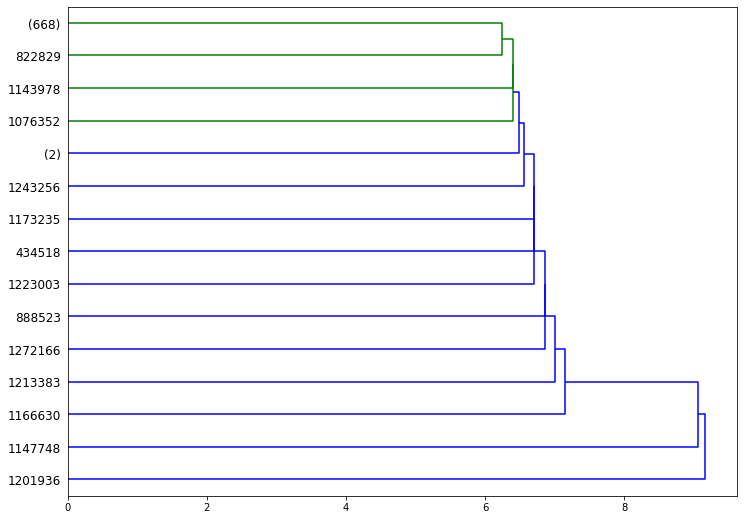

In [119]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(data.values, 'single')
fig = plt.figure(figsize =(12, 9))
dn = hierarchy.dendrogram(Z, truncate_mode = 'lastp',
                          p = 15, labels = ids.tolist(), 
                          orientation = 'right')

### 2. Complete Link 

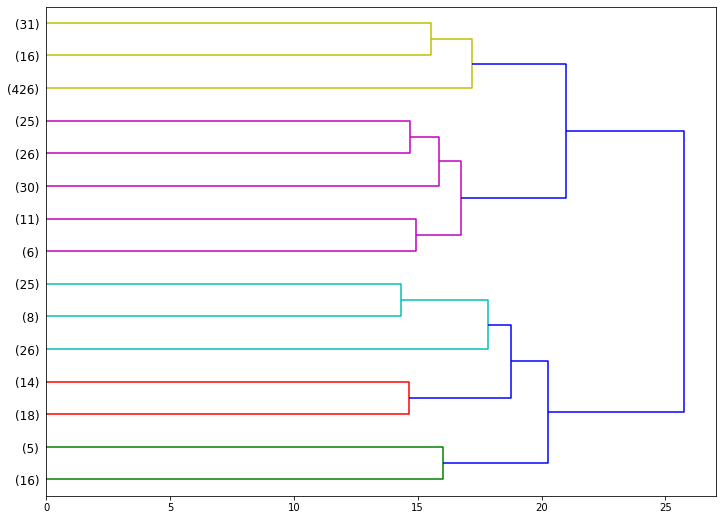

In [120]:
Z = hierarchy.linkage(data.values, 'complete')
fig = plt.figure(figsize =(12, 9))
dn = hierarchy.dendrogram(Z, truncate_mode = 'lastp',
                          p = 15, labels = ids.tolist(), 
                          orientation = 'right')

### 3. Group Average

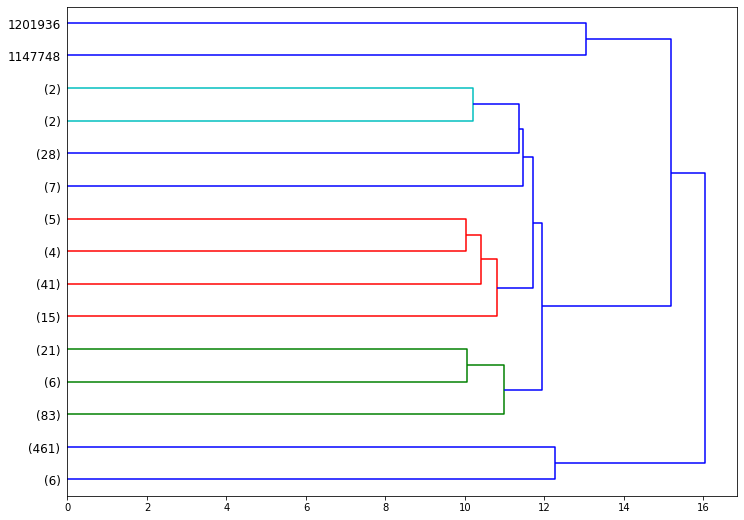

In [121]:
Z = hierarchy.linkage(data.values, 'average')
fig = plt.figure(figsize =(12, 9))
dn = hierarchy.dendrogram(Z, truncate_mode = 'lastp',
                          p = 15, labels = ids.tolist(), 
                          orientation = 'right')

## Part: 2 Waveform Database

In [148]:
#loading the dataset
data1 = pd.read_csv('../data/waveform_database_generator/waveform-+noise.data', 
                   header = None)
print(data1.shape)
data1.head()

(5000, 41)


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,2
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,0
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,1
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,0
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,1


In [149]:
# the dataset description says that there are no null values 
# checking if all the data types are numerical 
data1.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40      int64
dtype: object

In [150]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.018560,0.326166,0.650104,1.003314,1.352290,2.009400,2.665556,2.681282,2.676300,2.996004,...,0.030428,0.013870,0.033194,0.010934,0.018974,-0.025552,-0.010842,-0.004842,0.025928,0.992600
std,1.001376,1.038729,1.178916,1.421484,1.668542,1.836581,2.032674,1.757478,1.668996,1.524579,...,0.992020,1.015413,1.003251,1.003844,0.993279,0.992162,0.995722,1.010485,1.002822,0.818217
min,-3.540000,-3.220000,-3.070000,-3.270000,-3.470000,-3.240000,-2.970000,-2.710000,-2.260000,-1.720000,...,-3.410000,-3.440000,-3.730000,-3.490000,-3.520000,-3.390000,-3.290000,-3.510000,-3.750000,0.000000
25%,-0.682500,-0.390000,-0.170000,-0.020000,0.070000,0.640000,1.110000,1.340000,1.490000,1.900000,...,-0.640000,-0.660000,-0.650000,-0.650000,-0.660000,-0.720000,-0.660000,-0.670000,-0.652500,0.000000
50%,-0.030000,0.310000,0.640000,0.920000,1.200000,1.840000,2.530000,2.730000,2.825000,3.010000,...,0.040000,0.030000,0.060000,-0.000000,0.010000,-0.030000,-0.030000,0.000000,0.030000,1.000000
75%,0.660000,1.020000,1.430000,2.000000,2.530000,3.390000,4.220000,3.992500,3.940000,4.100000,...,0.700000,0.710000,0.730000,0.682500,0.682500,0.650000,0.670000,0.680000,0.690000,2.000000
max,3.350000,4.250000,4.720000,5.680000,6.660000,7.810000,8.530000,7.560000,7.330000,7.860000,...,3.190000,3.380000,4.040000,3.550000,3.330000,3.320000,3.720000,3.330000,3.500000,2.000000


In [152]:
# the last columns seems to the one that is for class labels. 
# hence, dropping it from our dataset for unsupervised learning (clustering)
print(data1.shape)
data1.drop(data1.columns[40], axis = 1, inplace = True)
print(data1.shape)


(5000, 41)
(5000, 40)


In [154]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.63,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,0.31,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.93,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,1.18,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,-0.07,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40


### Clustering on unlabelled data

Text(0, 0.5, 'Sum of Squares Error')

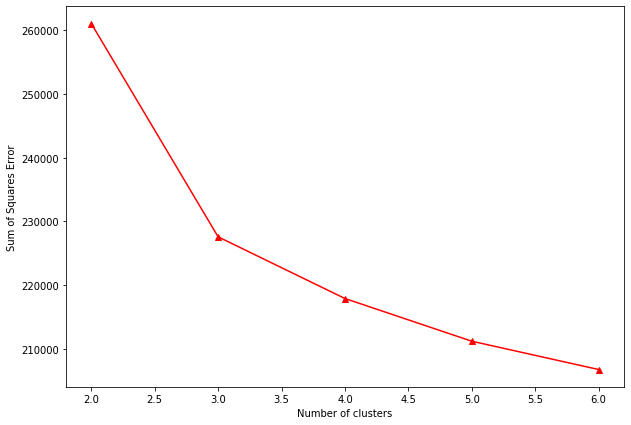

In [155]:
from sklearn import cluster 

numClusters = [2, 3, 4, 5, 6]
sse = []

for k in numClusters: 
    kMeans = cluster.KMeans(n_clusters = k)
    kMeans.fit(data1)
    sse.append(kMeans.inertia_)
    
fig = plt.figure(figsize = (10, 7))
plt.plot(numClusters, sse, marker = '^', color = 'r')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squares Error")

**Utilizing the elbow shaped graph, a good choice of number of clusters can be 4**

In [156]:
#getting the centers of clusters
centroids1 = kMeans.cluster_centers_ 
centroids1.shape

(6, 40)

In [157]:
pd.DataFrame(centroids1, columns = data1.columns)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.039162,0.440320,1.047043,1.558643,2.059009,2.590686,3.028902,2.570655,1.967241,1.959893,...,0.031768,0.028674,0.006936,0.048552,0.021585,0.015442,-0.006936,-0.010793,-0.001951,0.040000
1,-0.004945,0.094008,0.131793,0.187049,0.239174,0.394834,0.536365,0.579335,0.550906,1.438983,...,0.012880,0.087130,0.026536,0.064612,0.023505,0.038922,0.004381,-0.043333,0.028530,0.036888
2,0.022099,0.444113,0.818468,1.327901,1.743674,2.726397,3.821305,3.916128,4.021461,4.152582,...,-0.043447,0.037362,0.054752,0.033730,0.041901,-0.074028,-0.059092,0.114000,0.035305,0.028809
3,0.022289,0.019111,0.001431,-0.009895,0.011581,0.510843,0.988193,1.471611,2.048464,3.007184,...,0.023569,-0.040964,0.066416,-0.048886,-0.025557,0.016386,-0.047108,-0.108690,-0.003690,0.024458
4,-0.061064,0.831587,1.629945,2.533844,3.396514,4.308697,5.213670,4.490963,3.714945,3.010596,...,-0.014945,0.021321,-0.025991,0.055853,0.011321,0.054037,-0.052642,-0.017431,0.032844,0.053706
5,-0.029170,0.018397,0.087646,0.131020,0.262399,1.118442,1.990056,2.815706,3.698812,4.551043,...,0.007388,0.027388,-0.017848,0.019910,-0.008677,0.031951,0.003094,0.007511,-0.122758,-0.031749


In [158]:
# finding top 5 nearest neighbours 
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 5)
neigh.fit(data1)

dist1, ind1 = neigh.kneighbors(centroids1, 5, return_distance = True)

In [159]:
for i in range(len(centroids1)): 
    print("5 closest points to centroid ", i, centroids1[i])
    for j in range(5): 
        print("\t Point:",j, ", \t Distance= ", dist1[i, j])
        print(data1.iloc[ind1[i, j]])
        print("----------------------------------------------------------------------")
    print("-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-")
    print()
    print()

5 closest points to centroid  0 [-3.91615854e-02  4.40320122e-01  1.04704268e+00  1.55864329e+00
  2.05900915e+00  2.59068598e+00  3.02890244e+00  2.57065549e+00
  1.96724085e+00  1.95989329e+00  2.06742378e+00  1.97925305e+00
  2.00166159e+00  2.46879573e+00  3.03239329e+00  2.46708841e+00
  2.05317073e+00  1.50161585e+00  1.01253049e+00  4.72118902e-01
  4.24237805e-02  3.81402439e-02 -2.50304878e-02  3.96341463e-03
 -1.18292683e-02  1.05335366e-02 -1.27439024e-02 -3.75152439e-02
 -8.14024390e-03 -1.74542683e-02  3.17682927e-02  2.86737805e-02
  6.93597561e-03  4.85518293e-02  2.15853659e-02  1.54420732e-02
 -6.93597561e-03 -1.07926829e-02 -1.95121951e-03  4.00000000e-02]
	 Point: 0 , 	 Distance=  3.8440318325264276
0    -0.45
1     0.10
2     0.26
3     2.06
4     2.37
5     3.21
6     1.76
7     2.42
8     2.26
9     2.14
10    3.69
11    0.56
12    1.77
13    2.26
14    2.72
15    1.85
16    1.75
17    1.94
18    1.57
19    0.26
20    0.40
21   -0.77
22    0.34
23   -0.42
24   -0.

0    -0.83
1     0.41
2    -0.18
3     1.91
4     0.93
5     2.14
6     1.37
7     2.72
8     4.47
9     5.09
10    5.39
11    4.94
12    3.83
13    3.71
14    1.22
15    0.08
16    0.60
17    0.86
18    0.45
19    0.44
20   -0.34
21    0.79
22   -0.52
23   -0.13
24    0.04
25   -0.11
26   -1.21
27   -1.23
28   -0.13
29    0.53
30   -0.98
31   -0.04
32    0.22
33    0.17
34   -1.04
35   -1.32
36    0.87
37    0.04
38    0.09
39    0.95
Name: 1635, dtype: float64
----------------------------------------------------------------------
	 Point: 3 , 	 Distance=  4.626765336105953
0     0.64
1     1.64
2    -1.75
3     0.05
4     0.93
5     0.50
6     2.23
7     1.78
8     4.11
9     4.17
10    4.27
11    5.17
12    3.91
13    2.80
14    1.60
15    1.18
16    0.88
17    0.27
18    0.89
19    0.61
20   -0.75
21   -0.49
22   -0.67
23    0.54
24    0.07
25   -0.37
26   -0.89
27    0.74
28   -0.19
29    0.90
30    0.01
31   -0.27
32    0.29
33   -0.89
34    1.22
35   -1.14
36   -0.36
37   -1.05


## Hierarchical Clustering

### 1. Single Link

In [160]:
ids1 = []
for i in range(data1.shape[0]): 
    ids1.append(i)

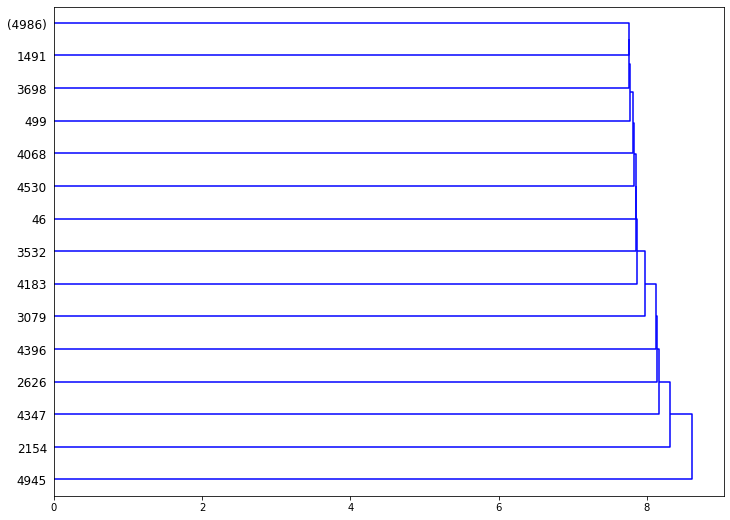

In [161]:
Z1 = hierarchy.linkage(data1.values, 'single')
fig = plt.figure(figsize =(12, 9))
dn = hierarchy.dendrogram(Z1, truncate_mode = 'lastp',
                          p = 15, labels = ids1, 
                          orientation = 'right')

### 2. Complete Link

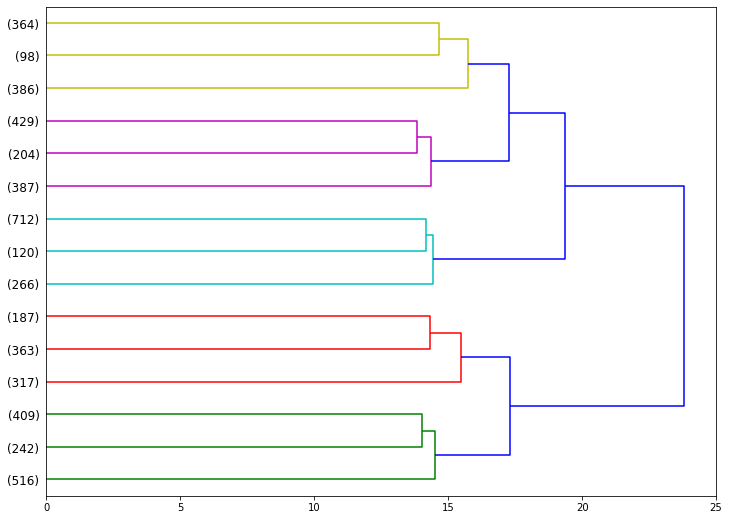

In [162]:
Z1 = hierarchy.linkage(data1.values, 'complete')
fig = plt.figure(figsize =(12, 9))
dn = hierarchy.dendrogram(Z1, truncate_mode = 'lastp',
                          p = 15, labels = ids1, 
                          orientation = 'right')

### 3. Group Average

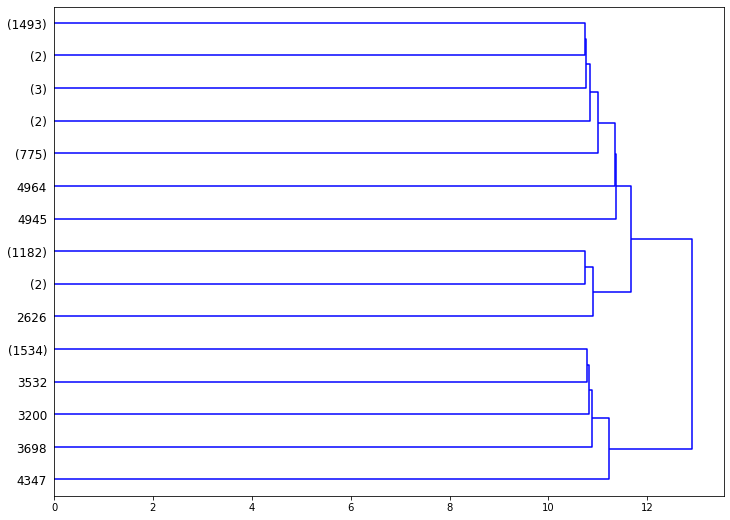

In [163]:
Z1 = hierarchy.linkage(data1.values, 'average')
fig = plt.figure(figsize =(12, 9))
dn = hierarchy.dendrogram(Z1, truncate_mode = 'lastp',
                          p = 15, labels = ids1, 
                          orientation = 'right')